In [55]:
# analysis_results.ipynb
# 路径: results_analysis/compare/analysis_results.ipynb
# 功能: 对 MOT 指标结果进行可视化分析，用于论文和报告
# 支持: SORT / DeepSORT / FairMOT 对比，序列分析，FP/FN/IDSW 可视化

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [56]:

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -------------------- 配置 --------------------
data_path = 'mot_metrics_comparison.csv'  # CSV 文件
output_dir = './plots'
os.makedirs(output_dir, exist_ok=True)

In [57]:

# -------------------- 读取指标 --------------------
df = pd.read_csv(data_path, index_col=[0,1])  # 多级索引: method, sequence
print("数据预览:")
display(df.head(10))

# 获取方法列表
methods = df.index.get_level_values(0).unique()
print(f"跟踪算法: {methods.tolist()}")

数据预览:


Frames       mota      motp      idf1  IDSW     FP   FN
SORT 0000     151 -23.452675  0.289801  0.035646    22   5859   61
     0001     447 -17.242820  0.306967  0.047011   228  48015  666
     0002     221  -5.525194  0.290252  0.085601    18   6111  605
     0003     144  -2.575758  0.228842  0.183537    12   1179  107
     0004     314  -8.129584  0.259147  0.087983    56   7207  205
     0005     297  -9.231373  0.258098  0.085255    88  12640  317
     0006     267 -16.752727  0.228169  0.034929    21   9532  211
     0007     698  -4.628875  0.291465  0.166667    76  12159  475
     0008     390 -15.636711  0.267295  0.059082    43  17061  298
     0009     762  -9.853795  0.314055  0.072526   196  29973  862

跟踪算法: ['SORT', 'DeepSORT', 'FairMOT']


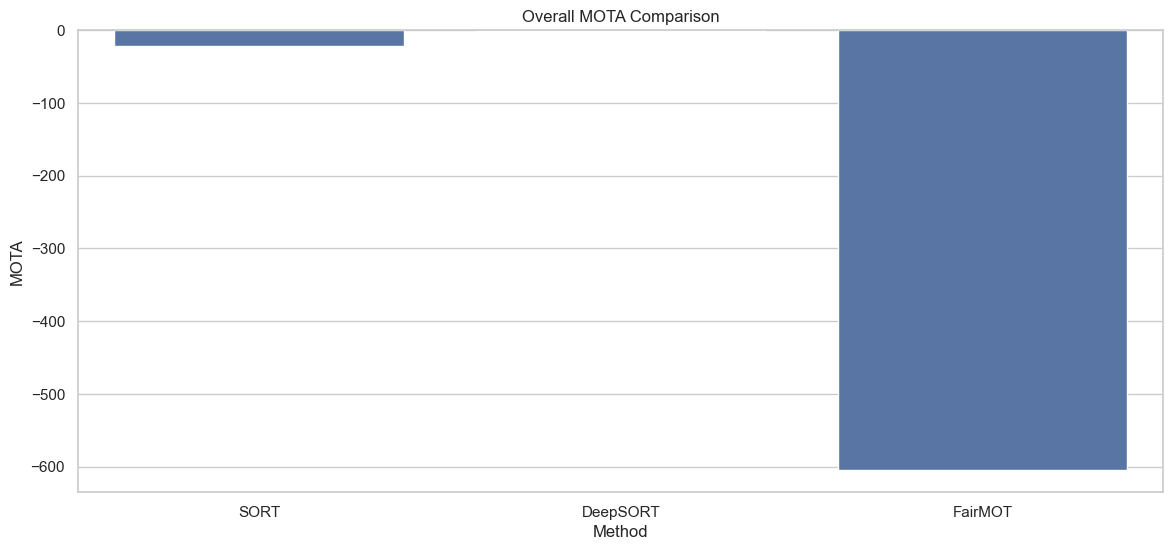

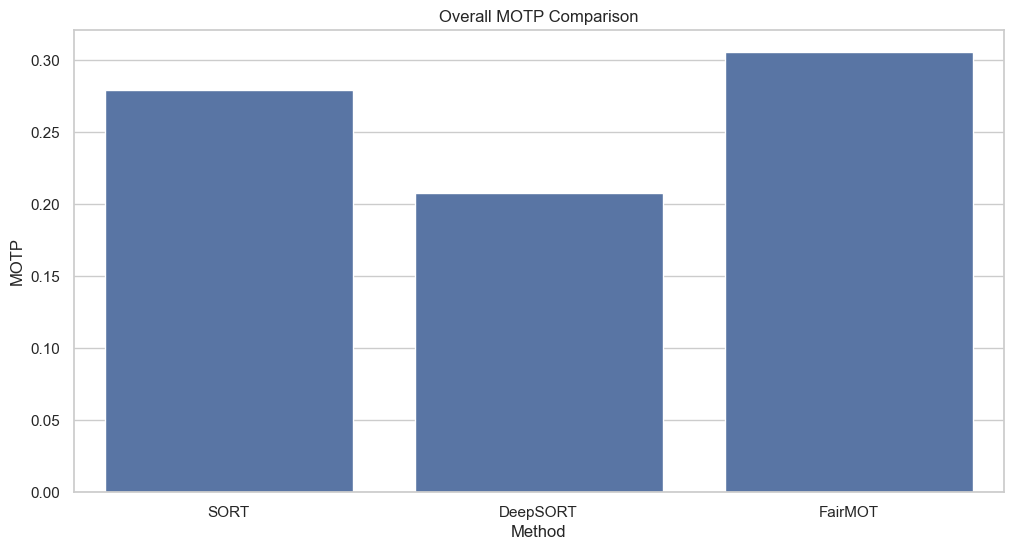

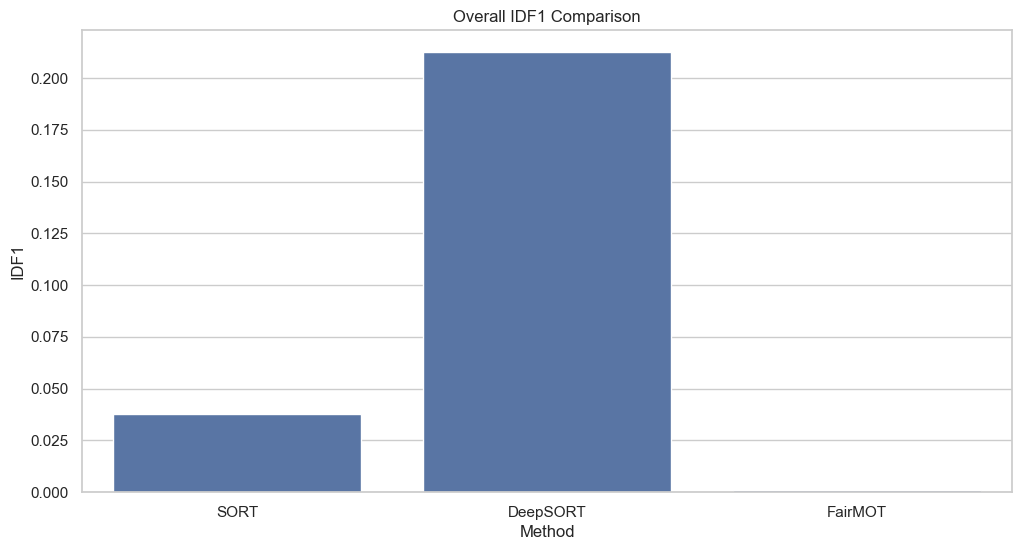

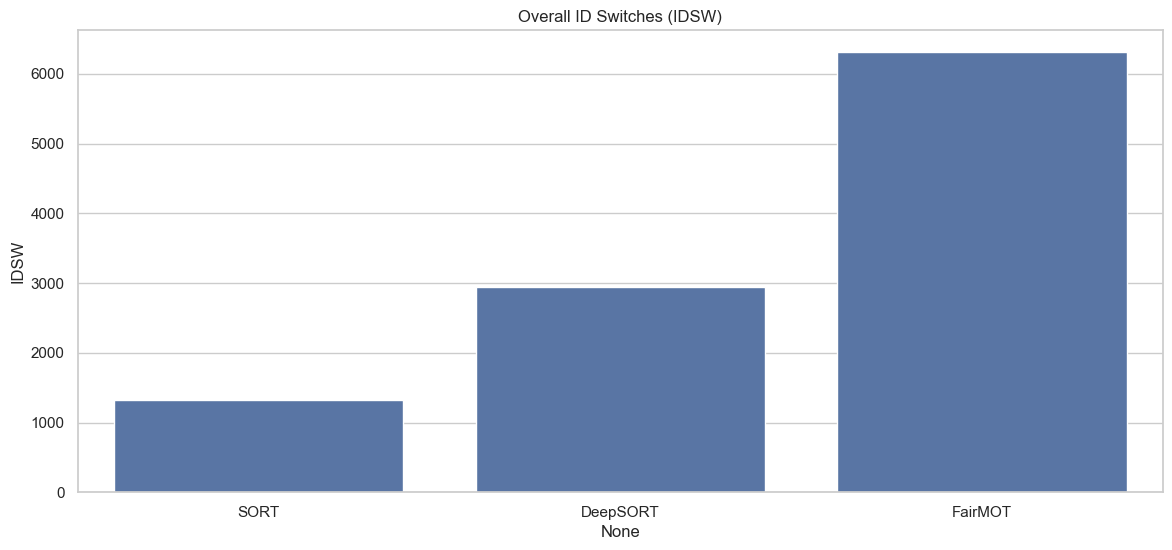

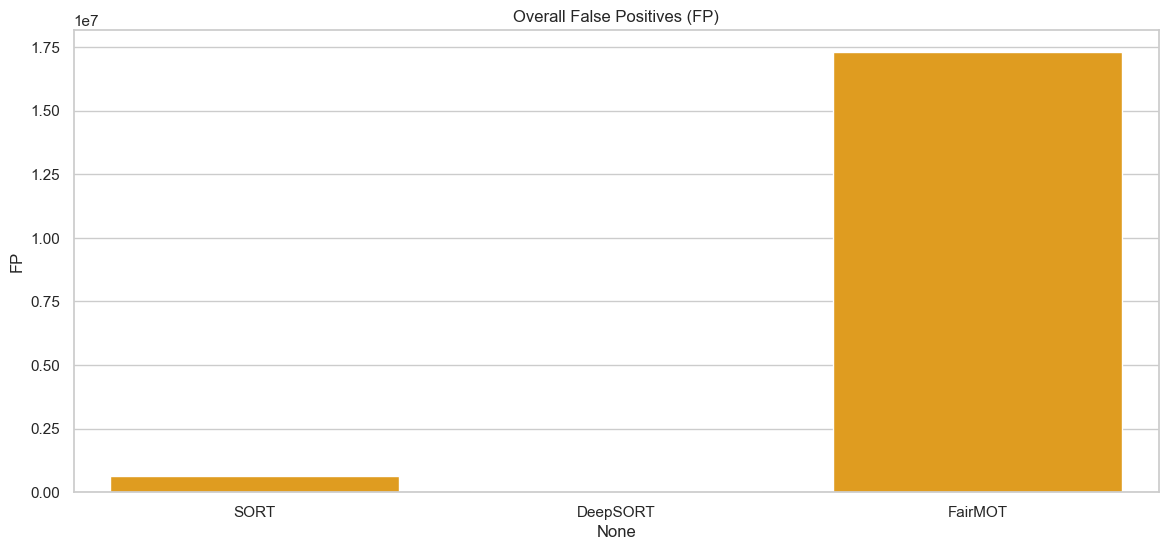

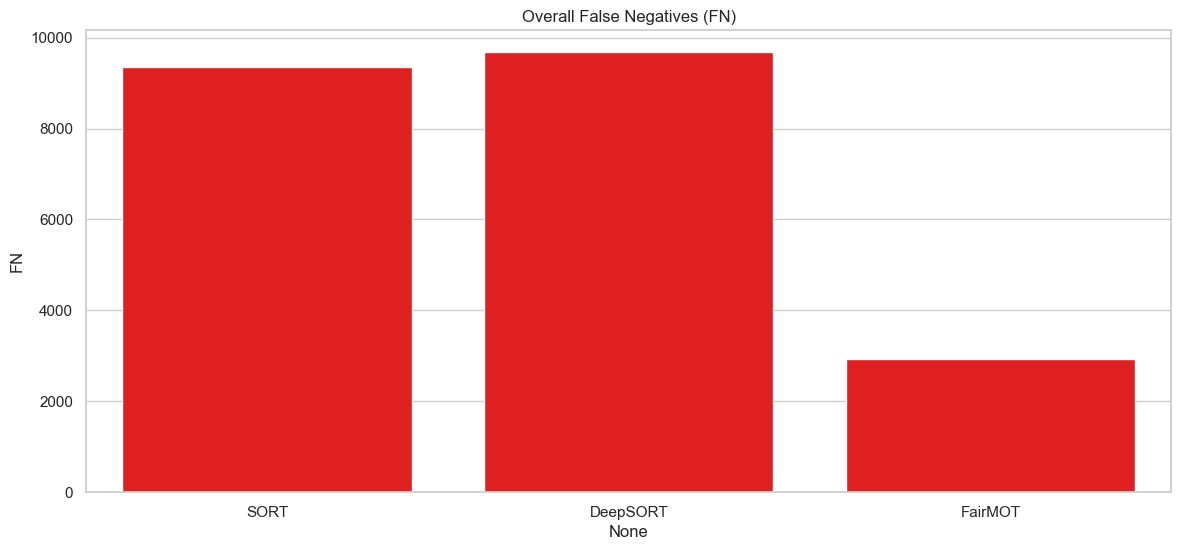

In [58]:

# -------------------- 1. OVERALL 指标对比 --------------------
overall = df.xs('OVERALL', level=1)
metrics = ['mota','motp','idf1','IDSW','FP','FN']

plt.figure(figsize=(14,6))
for metric in ['mota','motp','idf1']:
    sns.barplot(x=overall.index, y=overall[metric])
    plt.title(f'Overall {metric.upper()} Comparison')
    plt.ylabel(metric.upper())
    plt.xlabel('Method')
    plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x=overall.index, y=overall['IDSW'])
plt.title('Overall ID Switches (IDSW)')
plt.ylabel('IDSW')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x=overall.index, y=overall['FP'], color='orange')
plt.title('Overall False Positives (FP)')
plt.ylabel('FP')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x=overall.index, y=overall['FN'], color='red')
plt.title('Overall False Negatives (FN)')
plt.ylabel('FN')
plt.show()

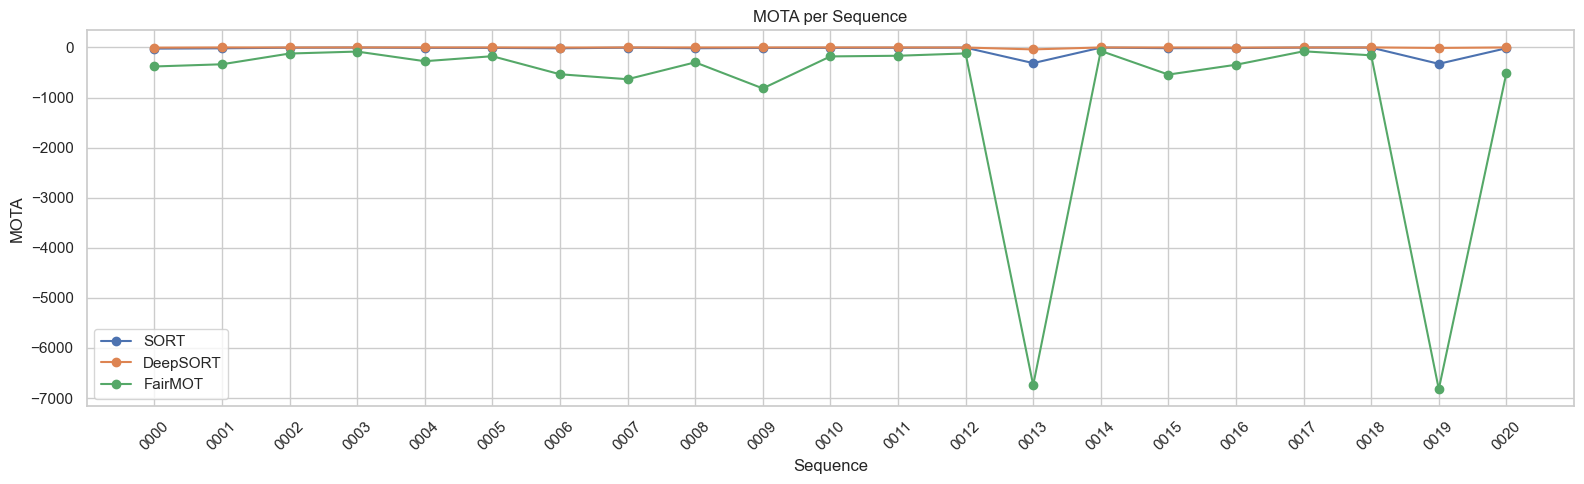

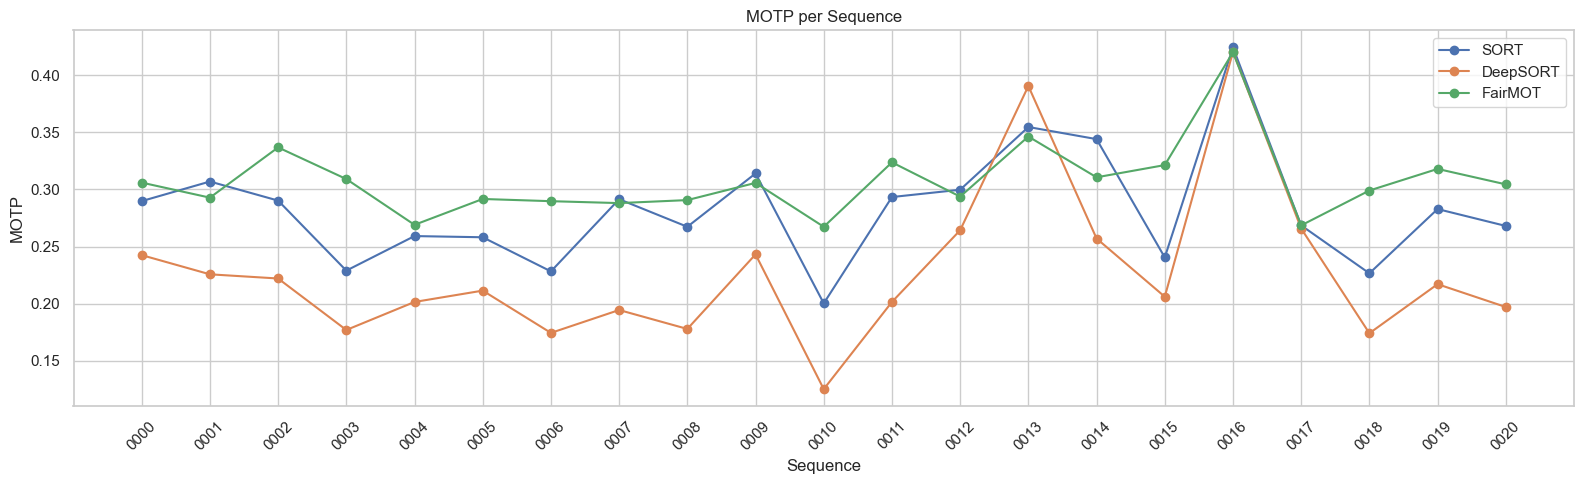

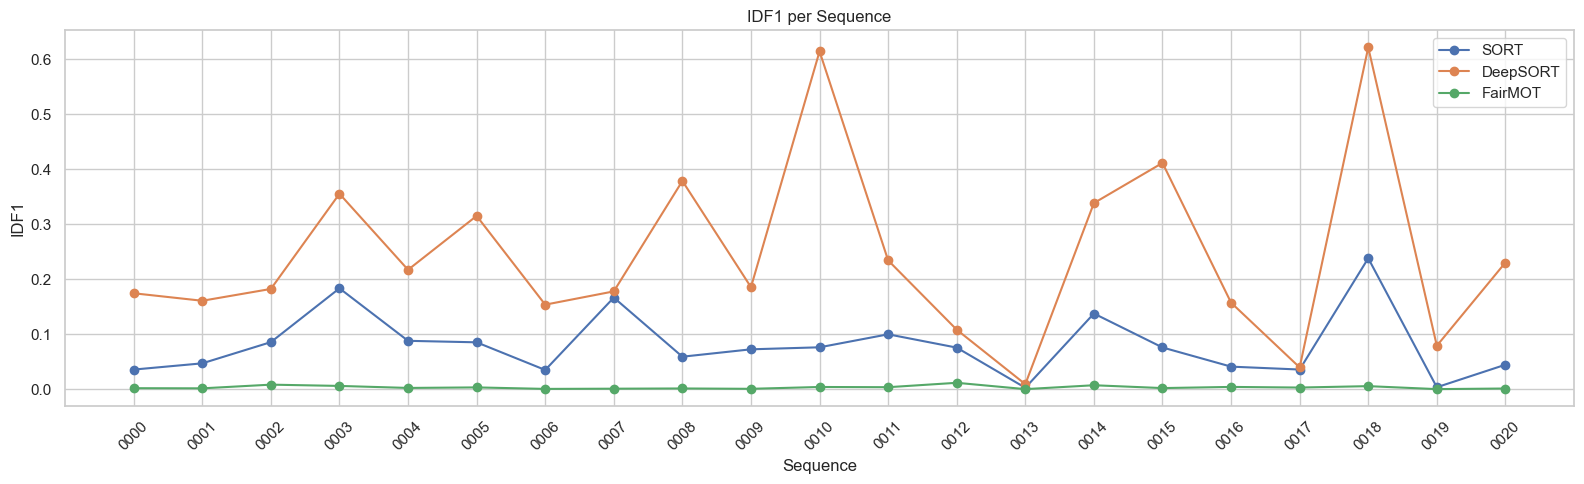

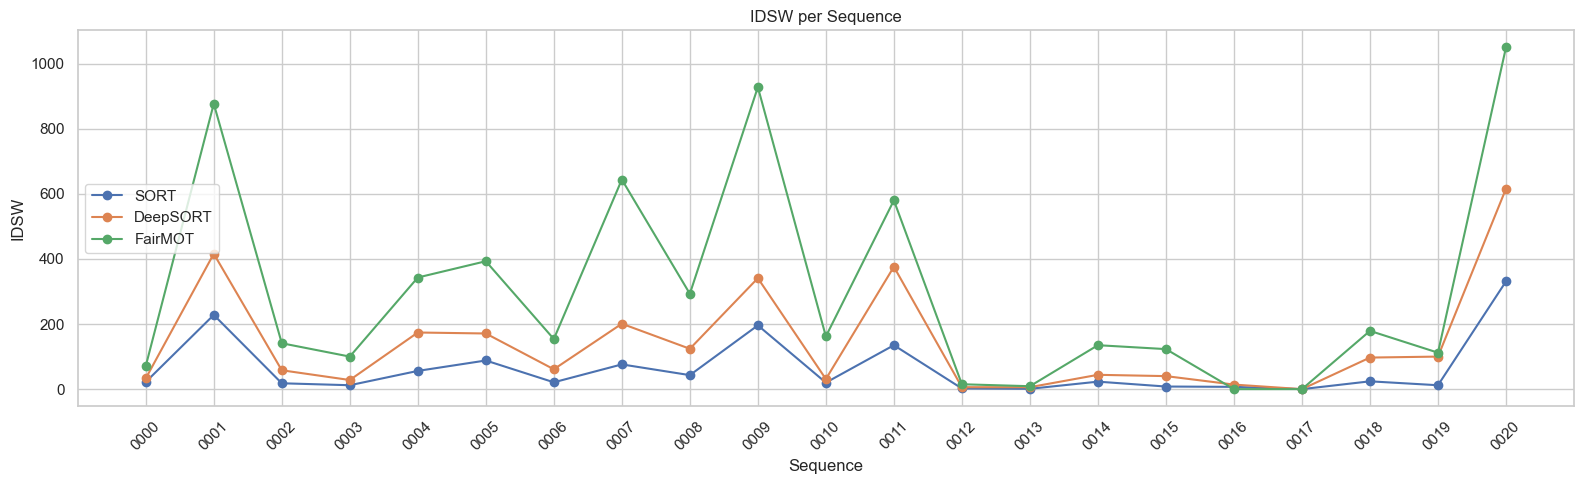

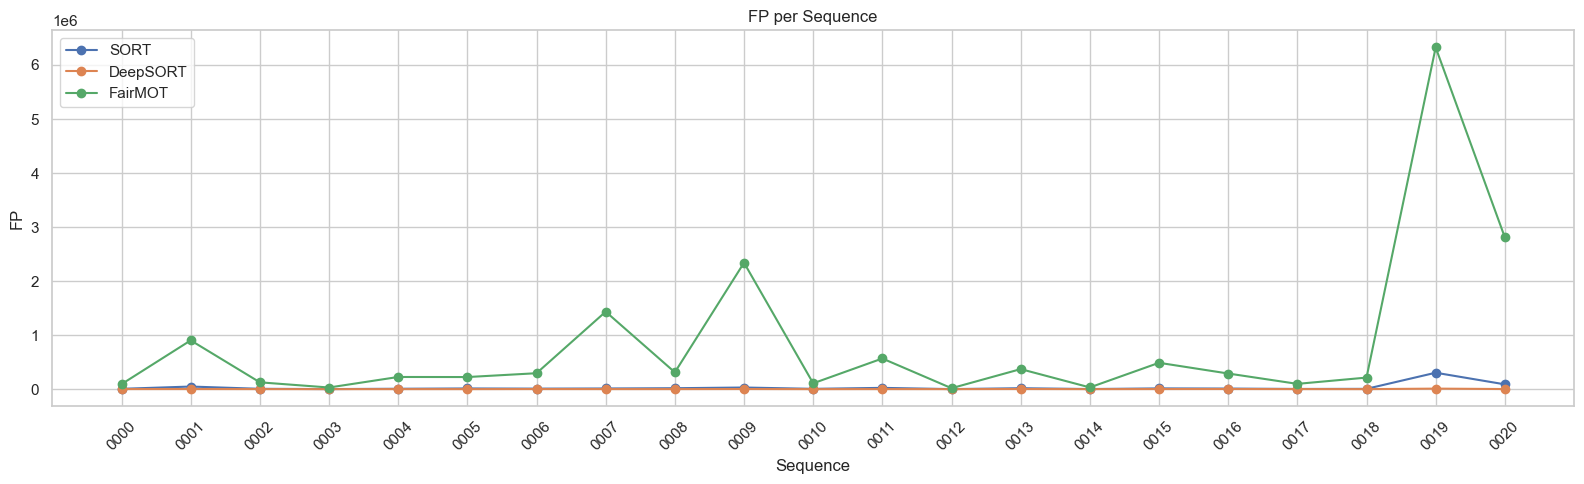

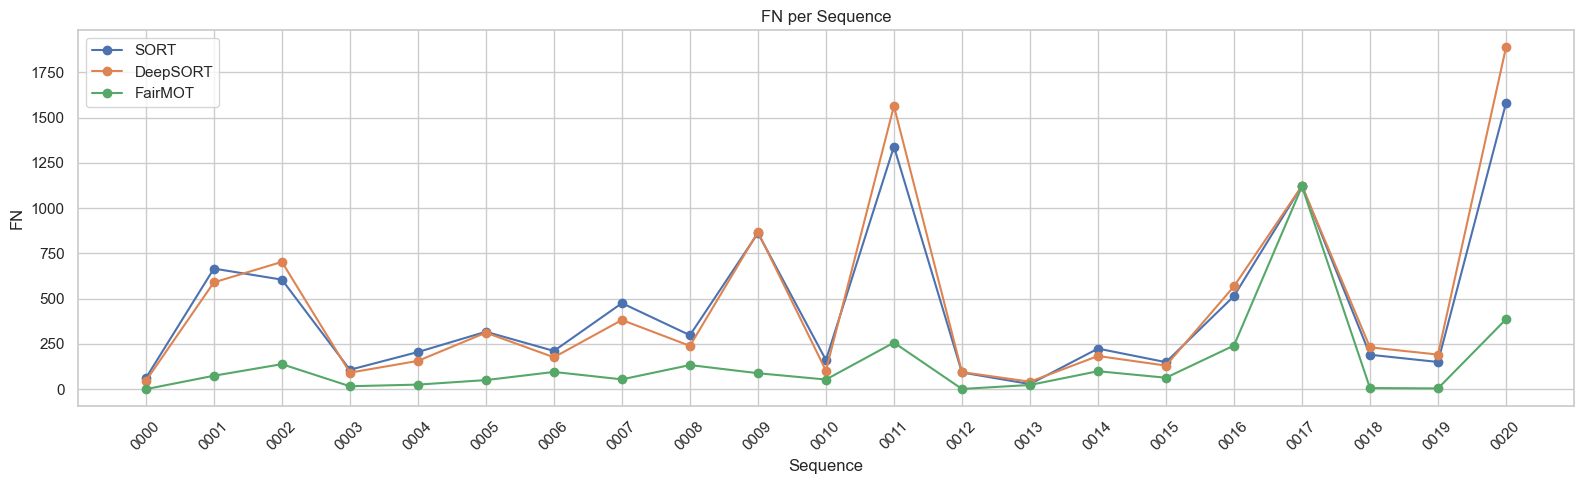

In [59]:

# -------------------- 2. 每个序列指标趋势 --------------------
sequences = df.index.get_level_values(1).unique().drop('OVERALL')

for metric in ['mota','motp','idf1','IDSW','FP','FN']:
    plt.figure(figsize=(16,5))
    for method in methods:
        seq_values = df.loc[method].loc[sequences][metric]
        plt.plot(sequences, seq_values, marker='o', label=method)
    plt.title(f'{metric.upper()} per Sequence')
    plt.xlabel('Sequence')
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{metric}_per_sequence.png'))
    plt.show()

C:\Users\Yin youai\AppData\Local\Temp\ipykernel_42128\2350927317.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


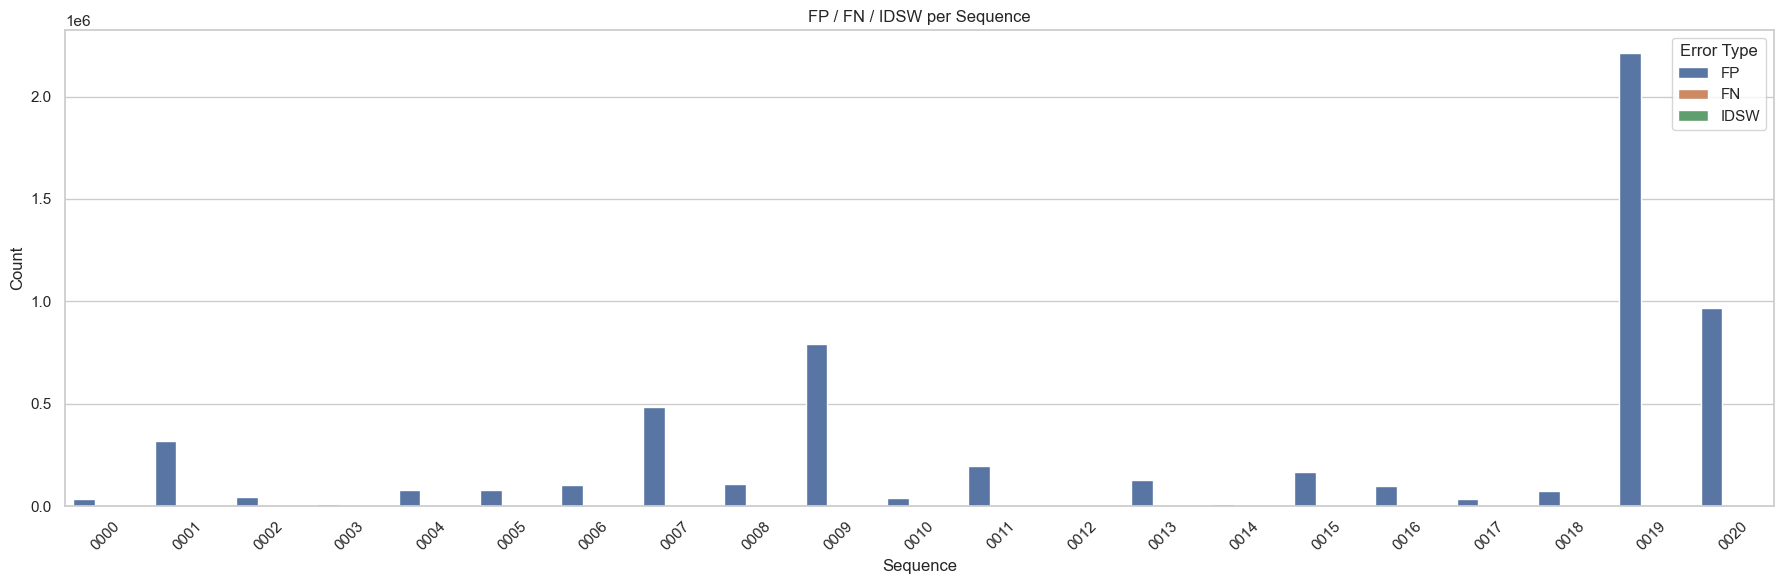

In [60]:
# -------------------- 3. FP / FN / IDSW 堆叠柱状图 --------------------

# 先把 MultiIndex 变成普通列
df_reset = df.reset_index()
df_reset.columns = ['Method', 'Sequence', 'Frames', 'mota', 'motp', 'idf1', 'IDSW', 'FP', 'FN']

# 去掉 OVERALL
df_seq = df_reset[df_reset['Sequence'] != 'OVERALL']

# 只保留需要的列
fp_fn_idsw = df_seq[['Method', 'Sequence', 'FP', 'FN', 'IDSW']]

# 转成长表（long format）
fp_fn_idsw = fp_fn_idsw.melt(
    id_vars=['Method', 'Sequence'],
    value_vars=['FP', 'FN', 'IDSW'],
    var_name='ErrorType',
    value_name='Count'
)

plt.figure(figsize=(18,6))
sns.barplot(
    data=fp_fn_idsw,
    x='Sequence',
    y='Count',
    hue='ErrorType',
    ci=None
)

plt.title('FP / FN / IDSW per Sequence')
plt.xlabel('Sequence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Error Type')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'fp_fn_idsw_per_sequence.png'))
plt.show()

In [61]:

# -------------------- 4. Top N 序列表现最差/最好 --------------------
for metric in ['mota','idf1']:
    print(f"\nTop 5 sequences by {metric.upper()}:")
    for method in methods:
        best5 = df.loc[method].loc[sequences][metric].sort_values(ascending=False).head(5)
        worst5 = df.loc[method].loc[sequences][metric].sort_values().head(5)
        print(f"{method} Best: {best5.to_dict()}")
        print(f"{method} Worst: {worst5.to_dict()}")

# -------------------- 5. 保存可视化数据 --------------------
summary_csv = os.path.join(output_dir, 'metrics_summary.csv')
df.to_csv(summary_csv)
print(f"\n✅ 可视化数据已保存: {summary_csv}")
print(f"所有图表已保存到: {output_dir}")



Top 5 sequences by MOTA:
SORT Best: {'0003': -2.575757575757576, '0017': -2.5789889415481837, '0018': -3.157311669128508, '0014': -3.4000000000000004, '0012': -3.986111111111111}
SORT Worst: {'0019': -326.90830636461703, '0013': -312.6, '0000': -23.45267489711934, '0001': -17.242819843342037, '0006': -16.752727272727274}
DeepSORT Best: {'0010': 0.5655058043117744, '0018': 0.5494830132939439, '0003': 0.3608815426997245, '0007': 0.2931798051372896, '0005': 0.2423529411764705}
DeepSORT Worst: {'0013': -38.89090909090909, '0019': -9.647249190938512, '0000': -3.880658436213992, '0016': -2.3421052631578947, '0006': -2.267272727272727}
FairMOT Best: {'0014': -69.22857142857143, '0017': -76.99052132701422, '0003': -82.41322314049587, '0012': -119.38888888888889, '0002': -121.46705426356588}
FairMOT Worst: {'0019': -6822.167206040993, '0013': -6742.0, '0009': -817.7047918852745, '0007': -634.3193091231178, '0015': -541.6095661846496}

Top 5 sequences by IDF1:
SORT Best: {'0018': 0.238245304424

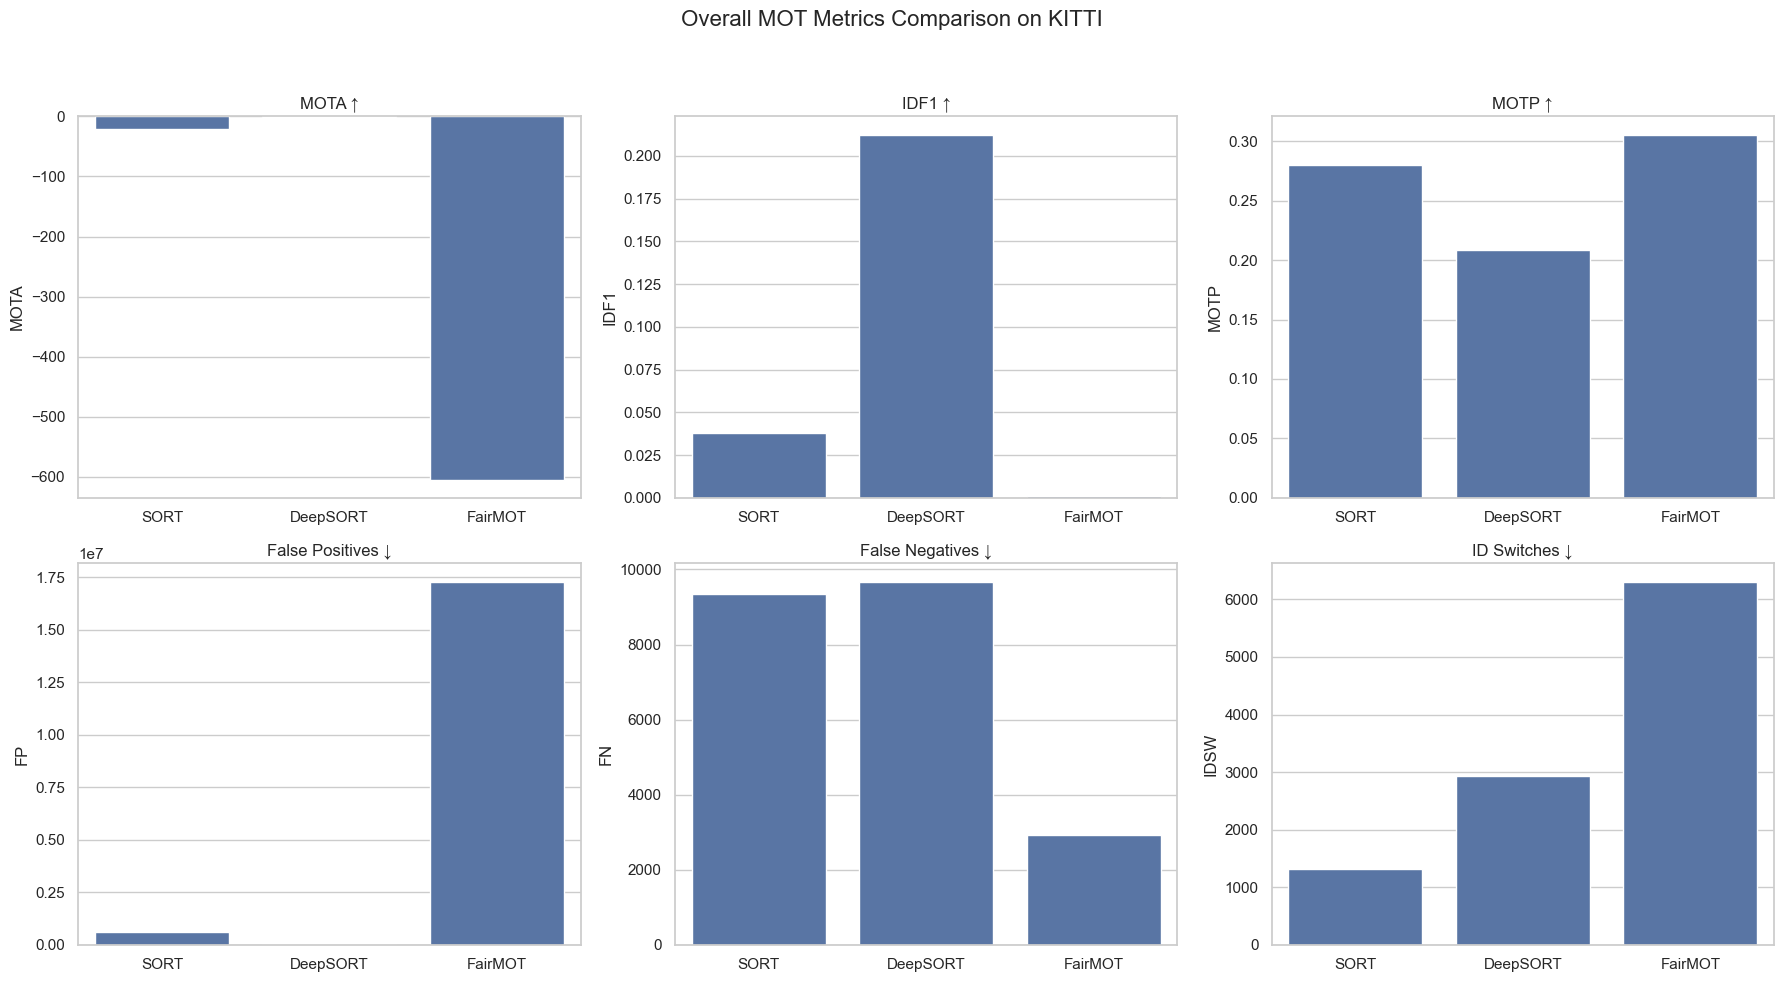

✅ 六指标子图已保存: ./plots\overall_metrics_6in1.png


In [63]:
# -------------------- 6. 六指标子图总览（论文级，稳定版） --------------------

# 取 OVERALL
overall = df.xs('OVERALL', level=1).reset_index()

# 自动识别方法列名（不写死 level_0）
method_col = overall.columns[0]   # 一定是方法名列

metrics = ['mota', 'idf1', 'motp', 'FP', 'FN', 'IDSW']
titles = ['MOTA ↑', 'IDF1 ↑', 'MOTP ↑',
          'False Positives ↓', 'False Negatives ↓', 'ID Switches ↓']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(
        data=overall,
        x=method_col,
        y=metric,
        ax=axes[i]
    )
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(metric.upper())

plt.suptitle('Overall MOT Metrics Comparison on KITTI', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

save_path = os.path.join(output_dir, 'overall_metrics_6in1.png')
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ 六指标子图已保存: {save_path}")
